In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

import json

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8296fd168477c9dc72c2cc0c229be3fb


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | voznesenskoye
Processing Record 2 of Set 12 | port alfred
Processing Record 3 of Set 12 | arroyo
Processing Record 4 of Set 12 | luwuk
Processing Record 5 of Set 12 | jaisalmer
Processing Record 6 of Set 12 | bluff
Processing Record 7 of Set 12 | rikitea
Processing Record 8 of Set 12 | constitucion
Processing Record 9 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 12 | tura
Processing Record 11 of Set 12 | barrow
Processing Record 12 of Set 12 | saint-philippe
Processing Record 13 of Set 12 | ulladulla
Processing Record 14 of Set 12 | riyadh
Processing Record 15 of Set 12 | dikson
Processing Record 16 of Set 12 | kalat
Processing Record 17 of Set 12 | bonavista
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | sobolevo
Processing Record 20 of Set 12 | pilar
Processing Record 21 of Set 12 | qandala
Processing Record 22 of Set 12 | kruisfontein

Processing Record 35 of Set 15 | olafsvik
Processing Record 36 of Set 15 | katsuura
Processing Record 37 of Set 15 | kiunga
Processing Record 38 of Set 15 | labuhan
Processing Record 39 of Set 15 | makhachkala
Processing Record 40 of Set 15 | wahran
City not found. Skipping...
Processing Record 41 of Set 15 | alofi
Processing Record 42 of Set 15 | srednekolymsk
Processing Record 43 of Set 15 | rio cuarto
Processing Record 44 of Set 15 | trairi
Processing Record 45 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 15 | aklavik
Processing Record 47 of Set 15 | moron
Processing Record 48 of Set 15 | karkaralinsk
City not found. Skipping...
Processing Record 49 of Set 15 | usinsk
Processing Record 50 of Set 15 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 16 | sing buri
Processing Record 2 of Set 16 | verkhnevilyuysk
Processing Record 3 of Set 16 | antofagasta
Processing Record 4 of Set 16 | kanniyakumari
Processing Record 5 

Processing Record 22 of Set 19 | santa isabel do rio negro
Processing Record 23 of Set 19 | agirish
Processing Record 24 of Set 19 | lima
Processing Record 25 of Set 19 | daeni
Processing Record 26 of Set 19 | murud
Processing Record 27 of Set 19 | xining
Processing Record 28 of Set 19 | ejido
Processing Record 29 of Set 19 | mataro
Processing Record 30 of Set 19 | meadow lake
Processing Record 31 of Set 19 | pinawa
Processing Record 32 of Set 19 | solovetskiy
City not found. Skipping...
Processing Record 33 of Set 19 | zilupe
Processing Record 34 of Set 19 | rocky mountain house
Processing Record 35 of Set 19 | solnechnyy
Processing Record 36 of Set 19 | kirakira
Processing Record 37 of Set 19 | falealupo
City not found. Skipping...
Processing Record 38 of Set 19 | urumqi
Processing Record 39 of Set 19 | wates
Processing Record 40 of Set 19 | husavik
Processing Record 41 of Set 19 | staunton
Processing Record 42 of Set 19 | kumano
Processing Record 43 of Set 19 | liyang
Processing Rec

Processing Record 10 of Set 23 | jabiru
City not found. Skipping...
Processing Record 11 of Set 23 | inirida
Processing Record 12 of Set 23 | kaabong
Processing Record 13 of Set 23 | flin flon
Processing Record 14 of Set 23 | strezhevoy
Processing Record 15 of Set 23 | balikpapan
Processing Record 16 of Set 23 | ukiah
Processing Record 17 of Set 23 | waddan
Processing Record 18 of Set 23 | nelson bay
Processing Record 19 of Set 23 | fairbanks
Processing Record 20 of Set 23 | pulandian
Processing Record 21 of Set 23 | manggar
Processing Record 22 of Set 23 | maningrida
Processing Record 23 of Set 23 | hun
Processing Record 24 of Set 23 | baghmara
Processing Record 25 of Set 23 | mustasaari
Processing Record 26 of Set 23 | puerto colombia
Processing Record 27 of Set 23 | nizhneyansk
City not found. Skipping...
Processing Record 28 of Set 23 | omboue
Processing Record 29 of Set 23 | alexandria
Processing Record 30 of Set 23 | ruatoria
City not found. Skipping...
Processing Record 31 of Se

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Voznesenskoye,RU,2020-08-01 03:49:34,54.89,42.76,57.96,82,59,4.61
1,Port Alfred,ZA,2020-08-01 03:49:34,-33.59,26.89,55.80,76,0,5.73
2,Arroyo,ES,2020-08-01 03:49:34,41.61,-4.80,64.99,72,28,3.36
3,Luwuk,ID,2020-08-01 03:49:34,-0.95,122.79,82.81,72,46,6.71
4,Jaisalmer,IN,2020-08-01 03:48:57,26.91,70.92,92.37,53,10,12.41
5,Bluff,NZ,2020-08-01 03:49:35,-46.60,168.33,53.87,83,100,6.08
6,Rikitea,PF,2020-08-01 03:49:35,-23.12,-134.97,73.58,85,100,6.31
7,Constitucion,CL,2020-08-01 03:49:35,-35.33,-72.42,53.02,69,100,3.96
8,Tura,IN,2020-08-01 03:47:10,25.52,90.22,87.84,68,72,1.83
9,Barrow,US,2020-08-01 03:49:35,71.29,-156.79,37.40,73,40,9.17


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
#today = time.strftime("%x")
#today

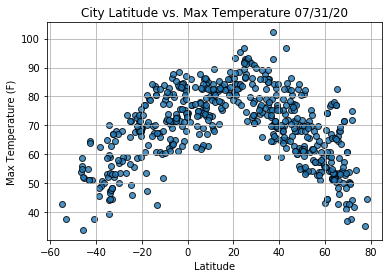

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

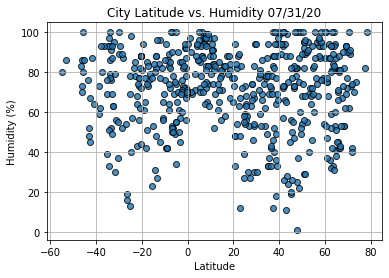

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

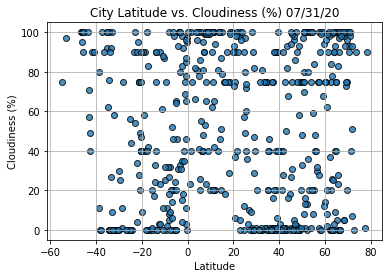

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

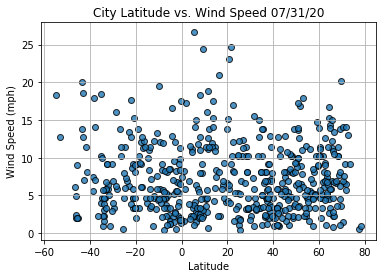

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
#row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City                       Dikson
Country                        RU
Date          2020-08-01 03:49:35
Lat                         73.51
Lng                         80.55
Max Temp                    54.57
Humidity                       75
Cloudiness                     90
Wind Speed                   9.17
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
543     True
544    False
545    False
546     True
547    False
Name: Lat, Length: 548, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Voznesenskoye,RU,2020-08-01 03:49:34,54.89,42.76,57.96,82,59,4.61
2,Arroyo,ES,2020-08-01 03:49:34,41.61,-4.80,64.99,72,28,3.36
4,Jaisalmer,IN,2020-08-01 03:48:57,26.91,70.92,92.37,53,10,12.41
8,Tura,IN,2020-08-01 03:47:10,25.52,90.22,87.84,68,72,1.83
9,Barrow,US,2020-08-01 03:49:35,71.29,-156.79,37.40,73,40,9.17


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

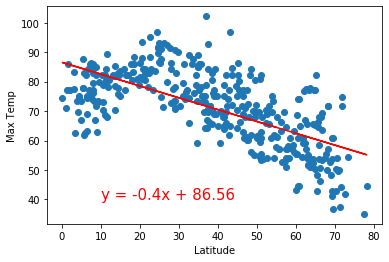

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

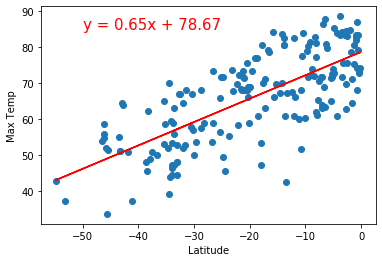

<function matplotlib.pyplot.show(*args, **kw)>

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))
plt.show

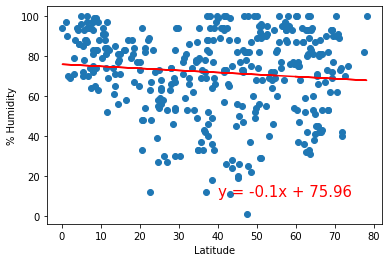

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
plt.show()

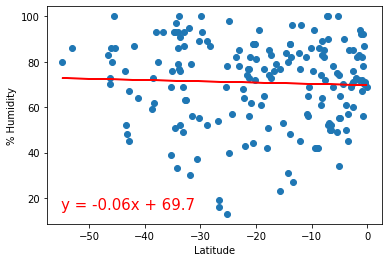

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,15))
plt.show()

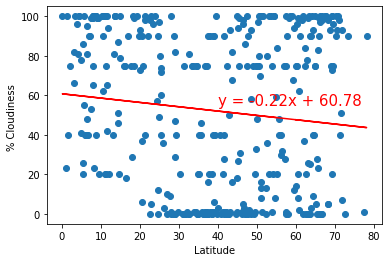

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness ',(40,55))
plt.show()


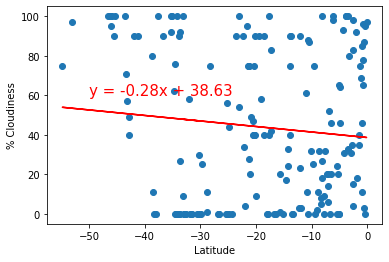

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
plt.show()

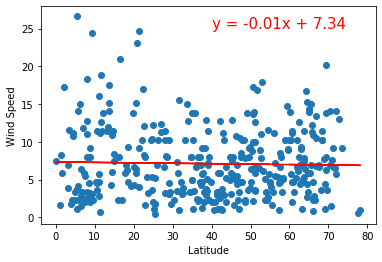

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))
plt.show()

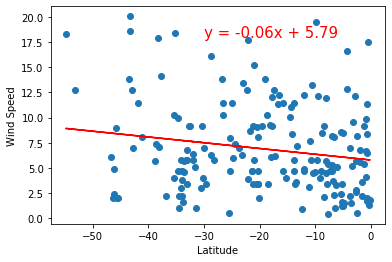

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,18))
plt.show()